In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# Simple linear model

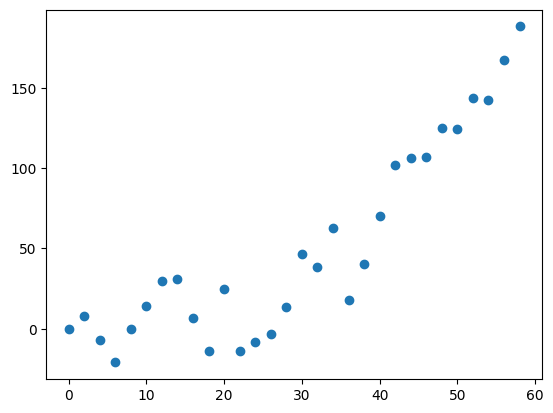

In [2]:
# initiating_data
SET_LEN = 60
NOISE_MULT = 60
NUM_FEATURES = 1
ALPHA = .0001

X = np.array(range(0, SET_LEN, 1))
X_tr, X_te = X[::2], X[1::2]

y_noise = (np.random.rand(len(X_tr)) - .5) * NOISE_MULT
Y_tr = .001 * X_tr ** 3 + y_noise

plt.scatter(X_tr, Y_tr)

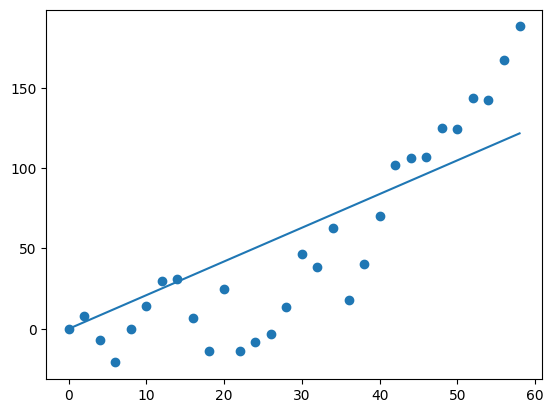

In [3]:
# initiating weights
W = np.random.rand(NUM_FEATURES).reshape(-1, 1)

# learning
for _  in range(20):
    pred = X_tr.reshape(-1 ,1) @ W

    #weight adjustment
    err = pred - Y_tr.reshape(-1,1)
    grad = (2 * X_tr @ err/ len(X_tr)) 
    W -= ALPHA * grad

    print(W)
    clear_output()
    plt.plot(X_tr, pred)
    plt.scatter(X_tr, Y_tr)
    plt.show()
    time.sleep(1)
